## haar cascade

* 2001년 Rapid Object Detection using a Boosted Cascade of Simple Features 논문에서 발표된 객체 검출기
* 사전 훈련된 xml 파일 제공
* 위 xml 파일은 현재 디렉토리에 저장해야 함 
* [haarcascade github](https://github.com/opencv/opencv/tree/master/data/haarcascades)

In [58]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

Number of faces detected: 12


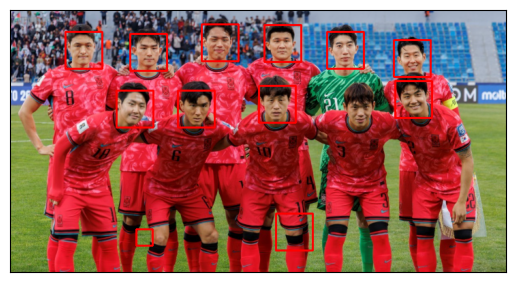

In [55]:
# 얼굴 검출출

image = cv2.imread('D:\\project\\GAN\\2. data_preprocessing\\sample_img.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


xml = 'D:\\project\\GAN\\2. data_preprocessing\\haarcascade_frontalface_default.xml' # 정면 xml 파일 정의 
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.5, 1)

print("Number of faces detected: " + str(len(faces)))

if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
# 검출된 얼굴 crop 및 save

def Cutting_face_save(image, name):
    face_cascade = cv2.CascadeClassifier(xml)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (255, 255, 255), 1)
        cropped = image[y: y+h, x: x+w]
        resize = cv2.resize(cropped, (512,512))
        cv2.imshow('resize', resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # 이미지 저장하기
        cv2.imwrite(f"D:\\project\\GAN\\2. data_preprocessing\\{name}_crop.jpg", resize)

image_names = [f for f in os.listdir('D:\\project\\GAN\\2. data_preprocessing') if f.endswith('.png')]

for name in image_names:
    img = cv2.imread(f'D:\\project\\GAN\\2. data_preprocessing\\{name}')

    Cutting_face_save(img, os.path.splitext(name)[0])